In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
sample_hold = 39

In [3]:
# Import the data

credit = pd.read_csv('Resources/lending_data.csv', )
credit

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [4]:
credit.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


# Predictions

I feel that Logistic Regression will perform better than the ensemble of random trees. I feel that Logistic Regression is more holistic and Random Forests might be more liable to overfitting.

This is because the logistic regression considers the data set as a single entity in higher-dimensional space, whilst the smaller decision trees in the random forest might individually overfit to their local region, leading to an over-all over-confidence.

In [5]:
# Split the data into X_train, X_test, y_train, y_test

X = credit[['loan_size','interest_rate','borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
y = credit['loan_status']

print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


array([[<AxesSubplot:xlabel='loan_size', ylabel='loan_size'>,
        <AxesSubplot:xlabel='interest_rate', ylabel='loan_size'>,
        <AxesSubplot:xlabel='borrower_income', ylabel='loan_size'>,
        <AxesSubplot:xlabel='debt_to_income', ylabel='loan_size'>,
        <AxesSubplot:xlabel='num_of_accounts', ylabel='loan_size'>,
        <AxesSubplot:xlabel='derogatory_marks', ylabel='loan_size'>,
        <AxesSubplot:xlabel='total_debt', ylabel='loan_size'>],
       [<AxesSubplot:xlabel='loan_size', ylabel='interest_rate'>,
        <AxesSubplot:xlabel='interest_rate', ylabel='interest_rate'>,
        <AxesSubplot:xlabel='borrower_income', ylabel='interest_rate'>,
        <AxesSubplot:xlabel='debt_to_income', ylabel='interest_rate'>,
        <AxesSubplot:xlabel='num_of_accounts', ylabel='interest_rate'>,
        <AxesSubplot:xlabel='derogatory_marks', ylabel='interest_rate'>,
        <AxesSubplot:xlabel='total_debt', ylabel='interest_rate'>],
       [<AxesSubplot:xlabel='loan_size', yla

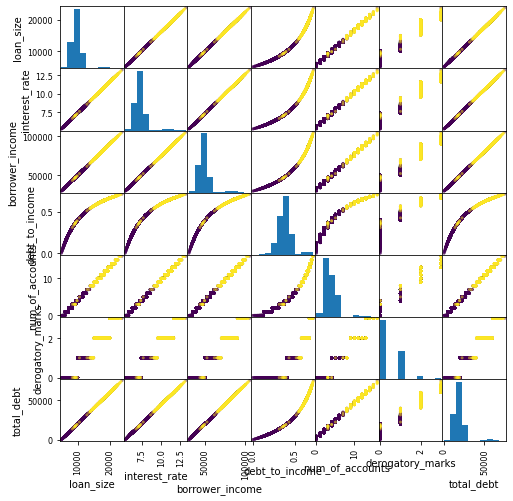

In [6]:
pd.plotting.scatter_matrix(X, c=y, figsize=(8,8))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)

In [8]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9917801623331958
Testing Data Score: 0.9926743706149401


In [10]:
# Train a Random Forest Classifier model and print the model score

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

target_names = ["Fail", "Pass"]

In [11]:
clf = RandomForestClassifier(random_state=sample_hold).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00     18750
        Pass       0.86      0.86      0.86       634

    accuracy                           0.99     19384
   macro avg       0.93      0.93      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Training Score: 0.9974549456596505
Testing Score: 0.9911267024349979


# Conclusion

The random forest did seem to over-fit the training data slightly with a score of 0.997, compared to the test score of 0.991 (3sf). 

The logistic regression model performed well on both with 0.992 on the training data, but slightly better on the test data with 0.993 (3sf). This shows it was generalising well from the taining data.

Overall the two models performed very similarly (0.991 compared to 0.993), with the Logistic Regression taking a very slight lead. for this Data, I would therefore use the Logistic Regression model, because of it's small improvement on the test data, but also because it did not over-fit the training data.

